In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import sys
import matplotlib.pyplot as plt
import random
import math
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from sklearn.decomposition import PCA

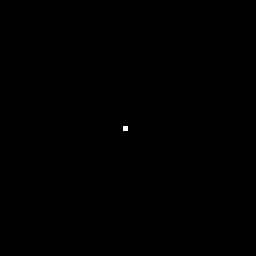

In [ ]:
import numpy as np

#Generate random "image" (replace this with your original image)
img_box = np.zeros((256,256,3));

#Make white box
box = np.array([255]*25*25*3).reshape(25,25,3)

#Generate random coordinates
x, y = np.random.randint(128-5,128, size=2)

#Replace original image with white box
img_box[x:x+25, y:y+25, :] = box


#Generate random "image" (replace this with your original image)
img_box2 = np.zeros((256,256,3));

#Make white box
box2 = np.array([255]*5*5*3).reshape(5,5,3)

#Generate random coordinates
x, y = np.random.randint(128-5,128, size=2)

#Replace original image with white box
img_box2[x:x+5, y:y+5, :] = box2

cv2_imshow(img_box2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
/usr/lo

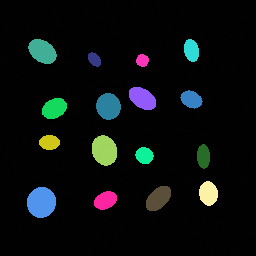

-1

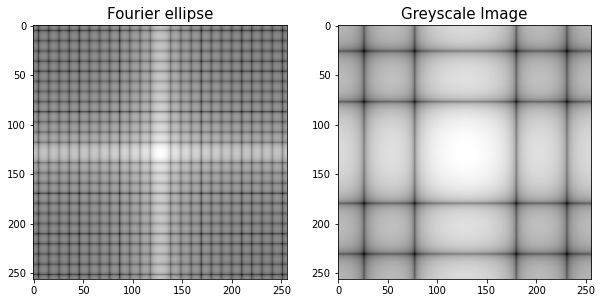

In [ ]:
# Python program to explain cv2.ellipse() method
	
image = np.zeros((256,256,3));
no_of_ellipses = (image.shape[0]//50 - 1) * (image.shape[1]//50 - 1) +2
startAngle = 0
endAngle = 360
f_size = 15
thickness = -1
mean = 0
var = 0.1
sigma = var ** 0.5

img = image
gaussian = np.random.normal(mean, sigma, (256, 256)) #  np.zeros((224, 224), np.float32)

noisy_image = np.zeros(img.shape, np.float32)



mask= np.zeros((no_of_ellipses, 256,256,3), dtype=complex)
fourier_mag= np.zeros((no_of_ellipses, 256,256,3), dtype=float)


grid_space = 50
ctr=0;

for pi in range(image.shape[0]//50 - 1):
  for pj in range(image.shape[0]//50 - 1):
    base = np.zeros((256,256,3));

    center_coordinates = ((pi + 1)*grid_space + random.randint(-10, 10), (pj + 1)*grid_space + random.randint(-10, 10))
    axesLength = (random.randint(5, 15), random.randint(5, 15))
    angle = random.randint(0, 180)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    ellipse_image = cv2.ellipse(base, (image.shape[0]//2,image.shape[1]//2), axesLength, angle,
                startAngle, endAngle, color, thickness)
    image = cv2.ellipse(image, center_coordinates, axesLength, angle,
                startAngle, endAngle, color, thickness)


    for k in range(3):
      #mask[i,:,:,k] = fourier_mask(ellipse_image[:,:,k], i)
      mask[ctr,:,:,k] = np.fft.fftshift(np.fft.fft2(rgb2gray(ellipse_image[:,:,k])))
      fourier_mag[ctr,:,:,k] = np.sqrt(np.square(mask[ctr,:,:,k].real) + np.square(mask[ctr,:,:,k].imag))
    ctr = ctr + 1
  mask[ctr,:,:,0] = np.fft.fftshift(np.fft.fft2(rgb2gray(img_box[:,:,0])))
  fourier_mag[ctr,:,:,0] = np.sqrt(np.square(mask[ctr,:,:,0].real) + np.square(mask[ctr,:,:,0].imag))
  mask[ctr+1,:,:,0] = np.fft.fftshift(np.fft.fft2(rgb2gray(img_box2[:,:,0])))
  fourier_mag[ctr+1,:,:,0] = np.sqrt(np.square(mask[ctr+1,:,:,0].real) + np.square(mask[ctr+1,:,:,0].imag))
  

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(np.log(abs(mask[no_of_ellipses -2,:,:,0])), cmap='gray')
ax[0].set_title('Fourier ellipse', fontsize = f_size)

fourier_mag[:,:,:,0] = np.log(abs(fourier_mag[:,:,:,0]))
ax[1].imshow(((fourier_mag[no_of_ellipses -1,:,:,0])), cmap = 'gray')
ax[1].set_title('Greyscale Image', fontsize = f_size);


# Displaying the image
#cv2_imshow(image)


if len(img.shape) == 2:
    noisy_image = img + gaussian
else:
    noisy_image[:, :, 0] = img[:, :, 0] + gaussian
    noisy_image[:, :, 1] = img[:, :, 1] + gaussian
    noisy_image[:, :, 2] = img[:, :, 2] + gaussian

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

cv2_imshow(noisy_image)

cv2.waitKey(0)

In [ ]:
#quantizing 16 levels
a11 = np.zeros((no_of_ellipses,4096))
a12 = np.zeros((no_of_ellipses,4096))
a13 = np.zeros((no_of_ellipses,4096))
a14 = np.zeros((no_of_ellipses,4096))
a21 = np.zeros((no_of_ellipses,4096))
a22 = np.zeros((no_of_ellipses,4096))
a23 = np.zeros((no_of_ellipses,4096))
a24 = np.zeros((no_of_ellipses,4096))

for i in range(no_of_ellipses):
  a11[i] = fourier_mag[i,0:64,0:64,0].flatten()
  a12[i] = fourier_mag[i,64:128,0:64,0].flatten()
  a13[i] = fourier_mag[i,128:192,0:64,0].flatten()
  a14[i] = fourier_mag[i,192:256,0:64,0].flatten()
  a21[i] = fourier_mag[i,0:64,64:128,0].flatten()
  a22[i] = fourier_mag[i,64:128,64:128,0].flatten()
  a23[i] = fourier_mag[i,128:192,64:128,0].flatten()
  a24[i] = fourier_mag[i,192:256,64:128,0].flatten()




In [ ]:
energy_a11 = np.zeros((no_of_ellipses))
energy_a12 = np.zeros((no_of_ellipses))
energy_a13 = np.zeros((no_of_ellipses))
energy_a14 = np.zeros((no_of_ellipses))
energy_a21 = np.zeros((no_of_ellipses))
energy_a22 = np.zeros((no_of_ellipses))
energy_a23 = np.zeros((no_of_ellipses))
energy_a24 = np.zeros((no_of_ellipses))

for i in range(no_of_ellipses):
  sum1 = 0
  sum2 = 0
  sum3 = 0
  sum4 = 0
  sum5 = 0
  sum6 = 0
  sum7 = 0
  sum8 = 0
  for j in range(4096):
    sum1 = sum1 + a11[i,j] ** 2
    sum2 = sum2 + a12[i,j] ** 2
    sum3 = sum3 + a13[i,j] ** 2
    sum4 = sum4 + a14[i,j] ** 2
    sum5 = sum5 + a21[i,j] ** 2
    sum6 = sum6 + a22[i,j] ** 2
    sum7 = sum7 + a23[i,j] ** 2
    sum8 = sum8 + a24[i,j] ** 2
  energy_a11[i] = np.sqrt(sum1)
  energy_a12[i] = np.sqrt(sum2)
  energy_a13[i] = np.sqrt(sum3)
  energy_a14[i] = np.sqrt(sum4)
  energy_a21[i] = np.sqrt(sum5)
  energy_a22[i] = np.sqrt(sum6)
  energy_a23[i] = np.sqrt(sum7)
  energy_a24[i] = np.sqrt(sum8)



In [ ]:
energy_a11

array([377.88324611,          inf, 363.69464136, 317.07723771,
       391.39809802, 404.68910905, 322.68755289, 273.73353272,
       288.04670732, 266.43766623, 395.56201441, 332.45460693,
       335.99334792, 393.40704031, 407.44467761, 378.80217026,
       294.55102073, 305.5592209 ])

In [ ]:
a = [energy_a11, energy_a12, energy_a13, energy_a14, energy_a21, energy_a22,energy_a23, energy_a24];
a = np.array(a).T

print(dunn(a))


nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
a.shape

(18, 8)

In [ ]:
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)

def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE


labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,2]
tsne = TSNE(n_components=2, verbose=1, random_state=1)
tsne_results = tsne.fit_transform(a) 

plt.figure(figsize=(8,8))
'''
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    legend="full",
    alpha=0.3
)
'''

sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    palette=sns.color_palette("hls", 2),
    legend="full",
    alpha=0.3
)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


ValueError: ignored

In [ ]:
tsne_results[:,1]

array([-122.39405 , -105.765854,  -74.68473 ,  -93.87072 ,  -49.021496,
        -96.95759 ,  -18.65702 ,  -74.19714 ,  -45.191536,  -71.06729 ,
        -61.021126,  -18.258545, -123.08023 ,  -31.33682 ,  -68.59253 ,
        -96.79479 ,  -43.06655 ], dtype=float32)

In [ ]:
pca.fit(a11)
a11_ei = pca.components_

pca.fit(a12)
a12_ei = pca.components_

pca.fit(a13)
a13_ei = pca.components_

pca.fit(a14)
a14_ei = pca.components_

pca.fit(a21)
a21_ei = pca.components_

pca.fit(a22)
a22_ei = pca.components_

pca.fit(a23)
a23_ei = pca.components_

pca.fit(a24)
a24_ei = pca.components_